# Подход 1: градиентный бустинг "в лоб"

In [1]:
import pandas
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

In [2]:
%matplotlib inline

In [3]:
def get_clean_data(cleaner_name='clean'):
    path = './clean/' + cleaner_name
    X_train = pandas.read_csv(path + '/X_train.csv', index_col='match_id')
    y_train = pandas.read_csv(path + '/y_train.csv', index_col='match_id')
    X_test = pandas.read_csv(path + '/X_test.csv', index_col='match_id')
    return X_train, y_train['radiant_win'], X_test

In [4]:
X, y, X_kaggle = get_clean_data()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

### Подбираем оптимальное число деревьев

In [5]:
scores = []
nums = [10, 20, 30, 40, 50]
for n in nums:
    print('n_estimators:', str(n))
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    start_time = datetime.datetime.now()
    model_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc')
    print('Time elapsed:', datetime.datetime.now() - start_time)
    print(model_scores)
    scores.append(np.mean(model_scores))

n_estimators: 10
Time elapsed: 0:01:57.435205
[0.66383799 0.66635457 0.66360048 0.66529818 0.66516222]
n_estimators: 20
Time elapsed: 0:04:32.576968
[0.68083889 0.68272733 0.67969876 0.6834932  0.6855512 ]
n_estimators: 30
Time elapsed: 0:16:15.390591
[0.68892093 0.68934663 0.68712298 0.69180598 0.69283583]
n_estimators: 40
Time elapsed: 0:13:26.646861
[0.69264125 0.69335305 0.69153074 0.69586466 0.69680392]
n_estimators: 50
Time elapsed: 0:09:24.033646
[0.69627399 0.69747879 0.69470891 0.69921915 0.69979097]


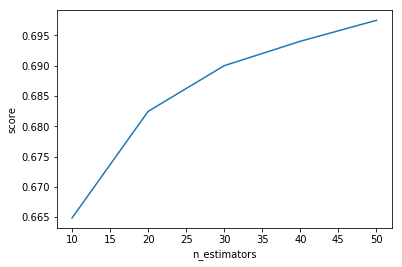

In [7]:
plt.plot(nums, scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

##### Как долго проводилась кросс-валидация для градиентного бустинга с 30 деревьями? Инструкцию по измерению времени можно найти выше по тексту. Какое качество при этом получилось?

Кросс-валидация для градиентного бустинга с 30 деревьями заняла 0:16:15. Показатель метрики качества AUC-ROC в таком случае равен 0.69.

##### Имеет ли смысл использовать больше 30 деревьев в градиентном бустинге? Что можно сделать, чтобы ускорить его обучение при увеличении количества деревьев?

Дa, имеет смысл использовать более 30 деревьев. Увеличение количества деревьев также увеличивает показатель метрики AUC-ROC. Он стремится к 0.7.  
Для ускорения обучения можно уменьшить глубину деревьев (max_depth) или можно использовать не всю выборку, а некоторое ее подмножество.